In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Define the file path
file_pattern = '/home/ABTLUS/victor.secco/data_processing/Eletroquímica/ECSA/2024-06-18/PtSex*mvS.txt'

# Load all files matching the pattern
all_files = glob.glob(file_pattern)

def extract_key(filename):
    # Assuming the key is part of the filename, e.g., 'PtSe2_123', extract '123'
    # Modify this as needed to match your filename structure
    key_part = filename.split('/')[-1].split('_')[1].replace('mvS.txt', '')
    return int(key_part)

# Sort files based on the extracted key
all_files.sort(key=extract_key)

# Initialize an empty list to store DataFrames
data_frames = []

# Process each file
for file in all_files:
    # Load the data from the file with the correct delimiter and decimal separator
    data = pd.read_csv(file, sep=';', decimal=',')
    
    # Discard rows where the "Scan" column is equal to 1
    cropped_data = data[data['Scan'] != 1]
    
    # Append the cropped DataFrame to the list
    data_frames.append(cropped_data)


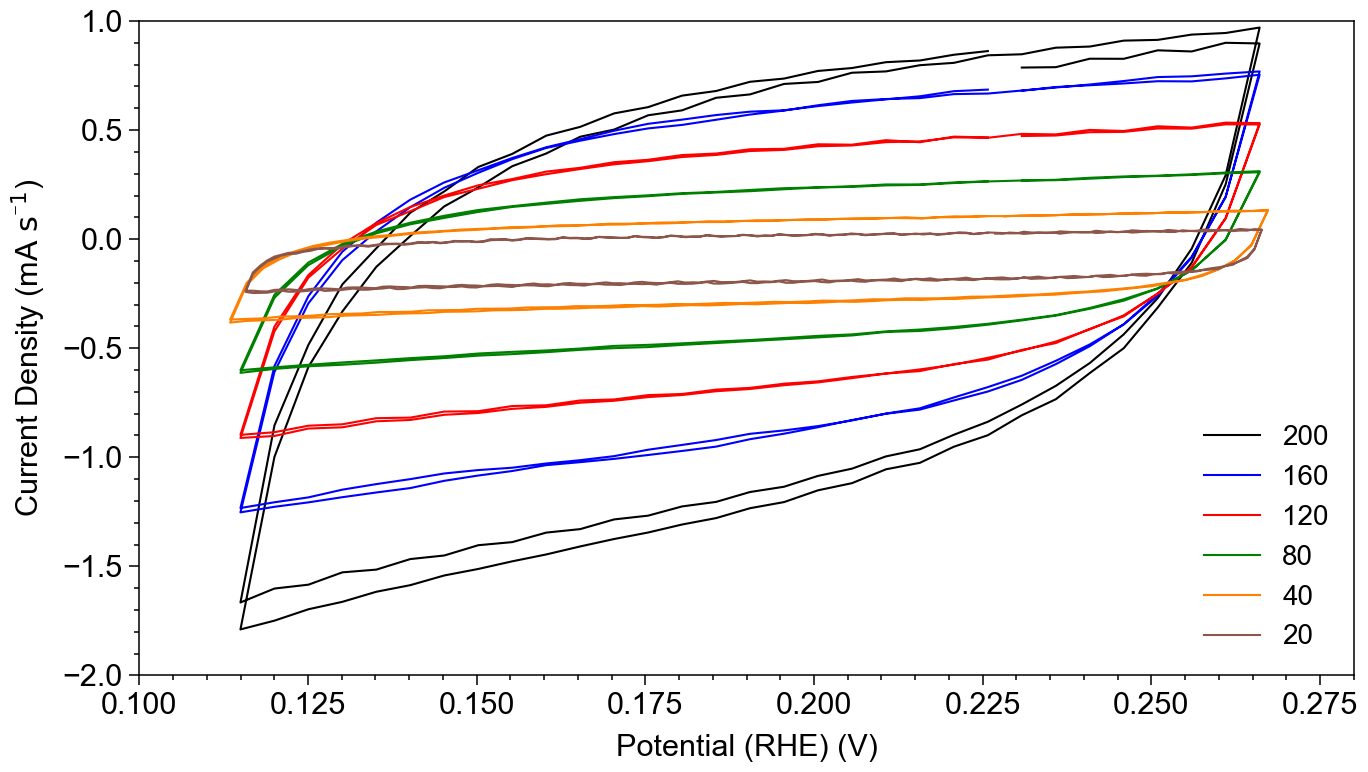

In [46]:
plt.figure(figsize=(14, 8))



for i, data in enumerate(data_frames[::-1]):
    plt.plot(data['Potential (RHE) (V)'], data['Current Density (mA cm-2)'], label=labels[i])


plt.xlabel('Potential (RHE) (V)', fontsize=22)
plt.ylabel(r'Current Density (mA $\rm{s^{⁻1}}$)', fontsize=22)

plt.legend(fontsize=22).get_frame().set_linewidth(0.0)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(fontsize=20).get_frame().set_linewidth(0.0)

plt.tight_layout()
plt.show()

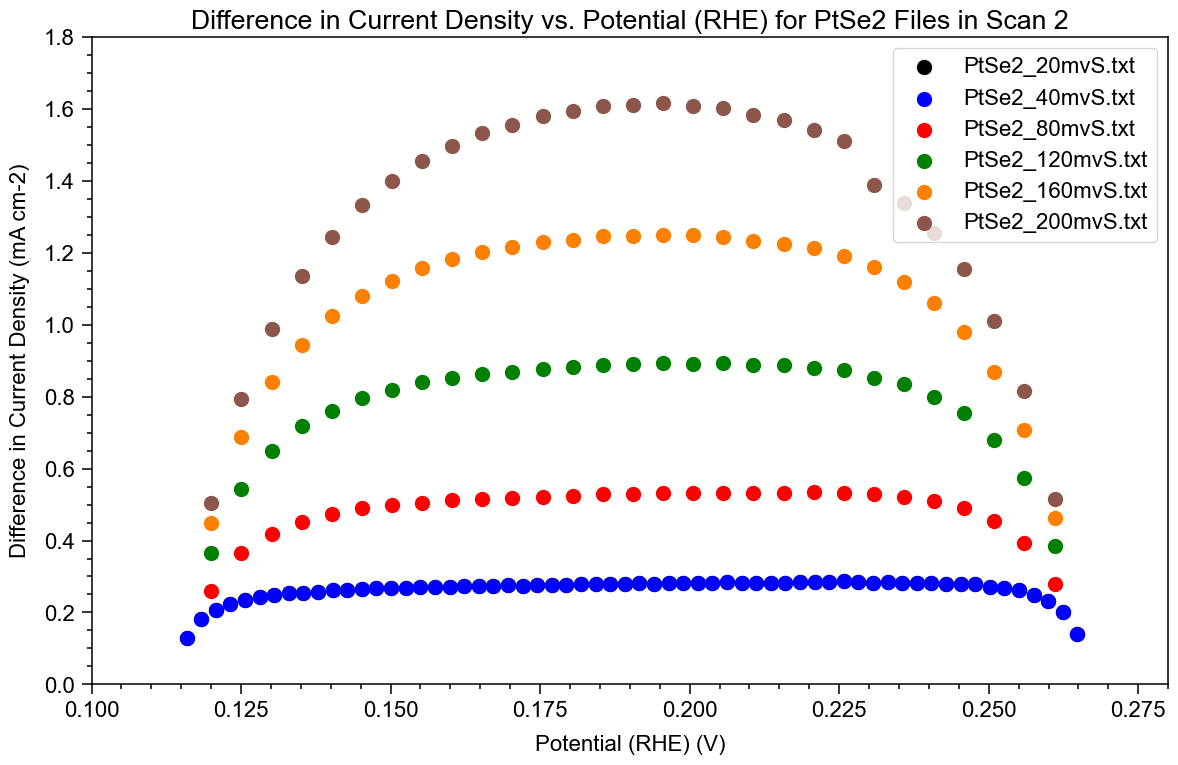

In [48]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Define the file path pattern for PtSe2 files only
file_pattern = '/home/ABTLUS/victor.secco/data_processing/Eletroquímica/ECSA/2024-06-18/PtSe2*mvS.txt'

# Load all files matching the pattern
all_files = glob.glob(file_pattern)

def extract_key(filename):
    # Assuming the key is part of the filename, e.g., 'PtSe2_123', extract '123'
    # Modify this as needed to match your filename structure
    key_part = filename.split('/')[-1].split('_')[1].replace('mvS.txt', '')
    return int(key_part)

# Sort files based on the extracted key
all_files.sort(key=extract_key)

# Initialize an empty list to store DataFrames
data_frames = []
max_differencesPtSe2 = {}

# Specific scan to filter
specific_scan = 2

# Process each file
for file in all_files:
    # Load the data from the file with the correct delimiter and decimal separator
    data = pd.read_csv(file, sep=';', decimal=',')
    
    # Filter to include only the specific scan
    scan_data = data[data['Scan'] == specific_scan]
    
    # Append the filtered DataFrame to the listz
    data_frames.append((file, scan_data))

# Plotting each PtSe2 file's data and calculating the difference in current density
plt.figure(figsize=(14, 8))

for file, data in data_frames:
    potential_values = data['Potential (RHE) (V)'].unique()
    differences = []
    
    for potential in potential_values:
        potential_data = data[data['Potential (RHE) (V)'] == potential]
        if len(potential_data) > 1:
            current_densities = potential_data['Current Density (mA cm-2)'].values
            difference = max(current_densities) - min(current_densities)
            differences.append((potential, difference))
            
    if differences:
        max_difference = max(differences[1])
        max_differencesPtSe2[file.split('/')[-1]] = max_difference

    if differences:
        potentials, current_differences = zip(*differences)
        plt.scatter(potentials, current_differences, label=file.split('/')[-1])
    


plt.xlabel('Potential (RHE) (V)')
plt.ylabel('Difference in Current Density (mA cm-2)')
plt.title('Difference in Current Density vs. Potential (RHE) for PtSe2 Files in Scan 2')
plt.legend()
plt.show()


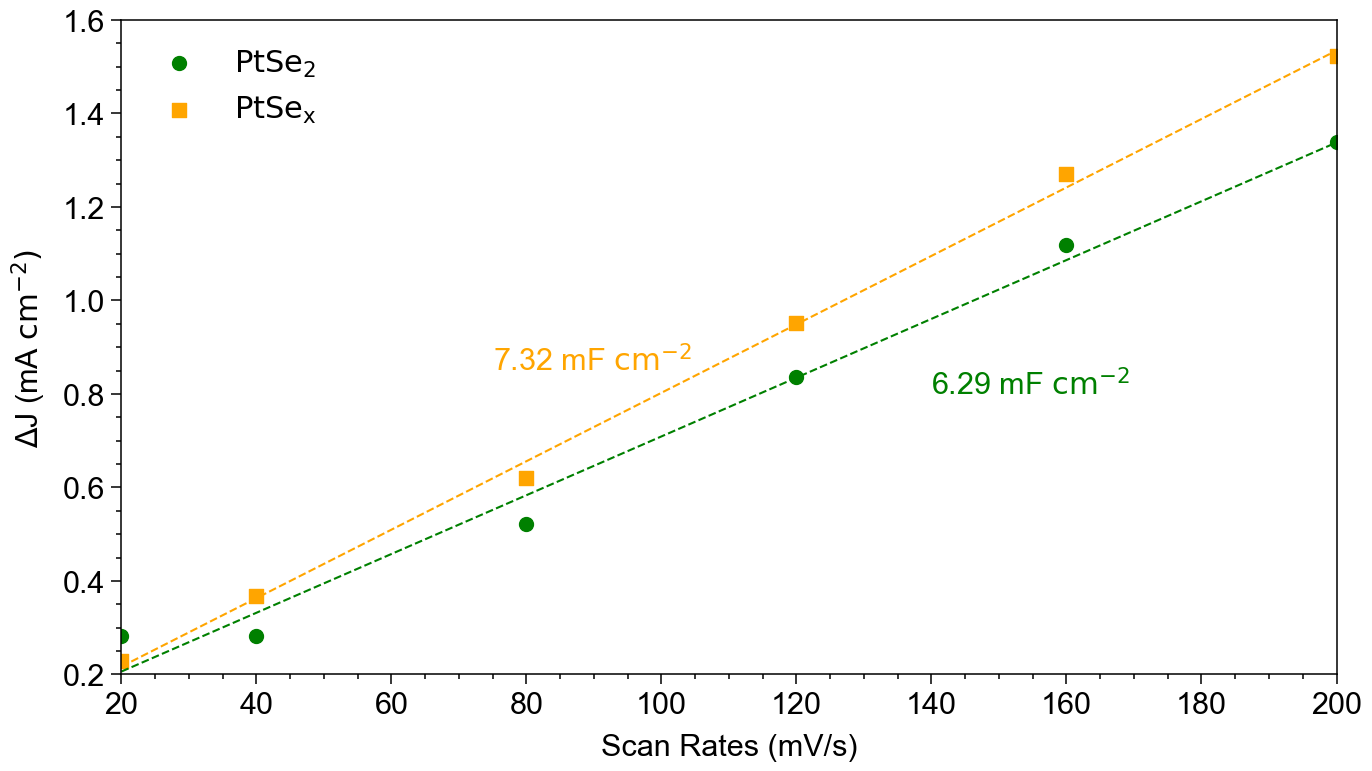

In [50]:
import numpy as np
from matplotlib.ticker import MultipleLocator

scan_rates = [20, 40, 80, 120, 160, 200]

max_diff_valuesPtSe2 = list(max_differencesPtSe2.values())
max_diff_valuesPtSex = list(max_differencesPtSex.values())


coefficients = np.polyfit(scan_rates, max_diff_valuesPtSe2, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(scan_rates)

coefficients1 = np.polyfit(scan_rates, max_diff_valuesPtSex, 1)
polynomial1 = np.poly1d(coefficients1)
trendline1 = polynomial1(scan_rates)

plt.figure(figsize=(14, 8))
plt.scatter(scan_rates, max_diff_valuesPtSe2, label = r'$\rm{PtSe_2}$', color='green', s=100)


plt.scatter(scan_rates, max_diff_valuesPtSex, marker="s", label = r'$\rm{PtSe_x}$', color='orange', s=100)

plt.plot(scan_rates, trendline, color='green', linestyle='--')
plt.plot(scan_rates, trendline1, color='orange', linestyle='--')

plt.xlabel('Scan Rates (mV/s)',  fontsize=22)
plt.ylabel(r'ΔJ (mA $\rm{cm^{-2})}$', fontsize=22)
plt.legend(fontsize=22).get_frame().set_linewidth(0.0)

plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.text(140, 0.8, f"{coefficients[0]*1000:.2f}" + r" mF $\rm{cm^{-2}}$", fontsize=22, color='green')
plt.text(75, 0.85, f"{coefficients1[0]*1000:.2f}" + r" mF $\rm{cm^{-2}}$", fontsize=22, color='orange')

plt.tight_layout()
plt.show()


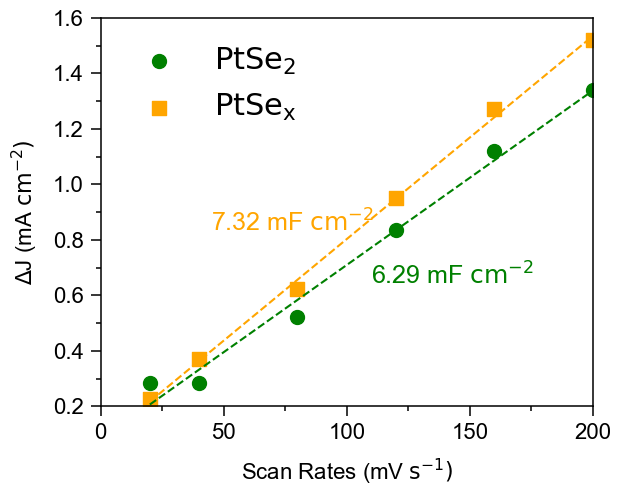

In [52]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator


rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 16
rcParams['axes.linewidth'] = 1.1
rcParams['axes.labelpad'] = 10.0
plot_color_cycle = cycler('color', ['000000', '0000FE', 'FE0000', '008001', 'FD8000', '8c564b', 
                                    'e377c2', '7f7f7f', 'bcbd22', '17becf'])
rcParams['axes.prop_cycle'] = plot_color_cycle
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams.update({"figure.figsize" : (6.4,4.8),
                 "figure.subplot.left" : 0.177, "figure.subplot.right" : 0.946,
                 "figure.subplot.bottom" : 0.156, "figure.subplot.top" : 0.965,
                 "axes.autolimit_mode" : "round_numbers",
                 "xtick.major.size"     : 7,
                 "xtick.minor.size"     : 3.5,
                 "xtick.major.width"    : 1.1,
                 "xtick.minor.width"    : 1.1,
                 "xtick.major.pad"      : 5,
                 "xtick.minor.visible" : True,
                 "ytick.major.size"     : 7,
                 "ytick.minor.size"     : 3.5,
                 "ytick.major.width"    : 1.1,
                 "ytick.minor.width"    : 1.1,
                 "ytick.major.pad"      : 5,
                 "ytick.minor.visible" : True,
                 "lines.markersize" : 10,
                 "lines.markerfacecolor" : "none",
                 "lines.markeredgewidth"  : 0.8})



plt.scatter(scan_rates, max_diff_valuesPtSe2, label = r'$\rm{PtSe_2}$', color='green', s=100)


plt.scatter(scan_rates, max_diff_valuesPtSex, marker="s", label = r'$\rm{PtSe_x}$', color='orange', s=100)

plt.plot(scan_rates, trendline, color='green', linestyle='--')
plt.plot(scan_rates, trendline1, color='orange', linestyle='--')

plt.xlabel(r'Scan Rates (mV $\rm{s^{-1})}$')
plt.ylabel(r'ΔJ (mA $\rm{cm^{-2})}$')
plt.legend(fontsize=22).get_frame().set_linewidth(0.0)

plt.text(45, 0.83, f"{coefficients1[0]*1000:.2f}" + r" mF $\rm{cm^{-2}}$", fontsize=18, color='orange')
plt.text(110, 0.64, f"{coefficients[0]*1000:.2f}" + r" mF $\rm{cm^{-2}}$", fontsize=18, color='green')

plt.gca().xaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.savefig("line_fit.png", dpi=1000)
plt.show()

In [53]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import matplotlib.font_manager


rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['font.size'] = 16
rcParams['axes.linewidth'] = 1.1
rcParams['axes.labelpad'] = 10.0
plot_color_cycle = cycler('color', ['000000', '0000FE', 'FE0000', '008001', 'FD8000', '8c564b', 
                                    'e377c2', '7f7f7f', 'bcbd22', '17becf'])
rcParams['axes.prop_cycle'] = plot_color_cycle
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams.update({"figure.figsize" : (10,8),
                 "figure.subplot.left" : 0.177, "figure.subplot.right" : 0.946,
                 "figure.subplot.bottom" : 0.156, "figure.subplot.top" : 0.965,
                 "axes.autolimit_mode" : "round_numbers",
                 "xtick.major.size"     : 7,
                 "xtick.minor.size"     : 3.5,
                 "xtick.major.width"    : 1.1,
                 "xtick.minor.width"    : 1.1,
                 "xtick.major.pad"      : 5,
                 "xtick.minor.visible" : True,
                 "ytick.major.size"     : 7,
                 "ytick.minor.size"     : 3.5,
                 "ytick.major.width"    : 1.1,
                 "ytick.minor.width"    : 1.1,
                 "ytick.major.pad"      : 5,
                 "ytick.minor.visible" : True,
                 "lines.markersize" : 10,
                 "lines.markerfacecolor" : "none",
                 "lines.markeredgewidth"  : 0.8})


labels = [200, 160, 120, 80, 40, 20]

for i, data in enumerate(data_frames[::-1]):
    plt.plot(data['Potential (RHE) (V)'], data['Current Density (mA cm-2)'], label=f"{labels[i]}" + r' mV $\rm{s^{-1}}$' )


plt.xlabel(r'Scan Rates (mV $\rm{s^{-1})}$')
plt.ylabel(r'Current density (mA $\rm{cm^{-2})}$')
plt.legend(fontsize=15).get_frame().set_linewidth(0.0)
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(n=2))
plt.savefig("cvs.png", dpi=1000)
plt.show()

TypeError: tuple indices must be integers or slices, not str

In [3]:
import pylab as pl
la = pl.matplotlib.font_manager.FontManager()
lu = pl.matplotlib.font_manager.FontProperties(family = 'Arial')
la.findfont(lu)

'/home/ABTLUS/victor.secco/hyperspy-bundle/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/Arial.ttf'

In [9]:
lu